<a href="https://colab.research.google.com/github/Nokyin1201/Nokyin/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
!pip install chart_studio
!pip install plotly
from chart_studio import plotly as py
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 858 kB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=315fd7f6c51aa1cb17882e1c661f7ede645bd808e80080f8a78c7023baa802ad
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path ="/content/drive/MyDrive/heart.csv"
df = pd.read_csv(path)
df.head()

# Sex: 1 = male; 0 = female
# cp: Chest pain type
# trestbps: resting blood pressure (in mm Hg) 高血壓
#　chol： Serum cholestoral　(in mg/dl) 血清膽固醇
# fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 空腹血糖
# restecg: Resting electrocardiographic results 靜息心電圖結果
# thalach: Maximum heart rate achieved 達到的最大心率
# exang: Exercise induced angina (1 = yes; 0 = no) 運動誘發的心絞痛
# oldpeak: ST depression induced by exercise relative to rest
# slope:The slope of the peak exercise ST segment. Value 0: upsloping Value 1: flat Value 2: downsloping
# ca: number of major vessels (0-4) colored by flourosopy
# thal: (0 = error (in the original dataset 0 maps to NaN's)1 = fixed defect 2 = normal 3 = reversable defect)
# target: Have disease? (1 = Yes; 0 = No)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
def missing_cols(df):
  for col in df.columns:
    missing_vals = df[col].isnull().sum()
    if missing_vals != 0:
      print(col)
      print(missing_vals)

missing_cols(df)

In [ ]:
nullMap = df.isnull().replace(to_replace = [False, True], value = [0, 1])
print(nullMap.head())
fig = go.Figure(data = go.Heatmap(
    z = nullMap
))
fig.show()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    0    0   0         0     0    0        0        0      0        0      0   
1    0    0   0         0     0    0        0        0      0        0      0   
2    0    0   0         0     0    0        0        0      0        0      0   
3    0    0   0         0     0    0        0        0      0        0      0   
4    0    0   0         0     0    0        0        0      0        0      0   

   ca  thal  target  
0   0     0       0  
1   0     0       0  
2   0     0       0  
3   0     0       0  
4   0     0       0  


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
counts = df.nunique()
print(counts)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df2 = df.copy()

In [ ]:
df1 = df.pivot_table(index = "sex")
print(df1)
print("===================================================================================")
df1 = df.pivot_table(index = ["sex","target"])
print(df1)

           age        ca        chol        cp     exang      fbs   oldpeak  \
sex                                                                           
0    55.677083  0.552083  261.302083  1.041667  0.229167  0.12500  0.876042   
1    53.758454  0.811594  239.289855  0.932367  0.371981  0.15942  1.115459   

      restecg     slope    target      thal     thalach    trestbps  
sex                                                                  
0    0.572917  1.427083  0.750000  2.125000  151.125000  133.083333  
1    0.507246  1.386473  0.449275  2.400966  148.961353  130.946860  
                  age        ca        chol        cp     exang       fbs  \
sex target                                                                  
0   0       59.041667  1.291667  274.958333  0.166667  0.583333  0.250000   
    1       54.555556  0.305556  256.750000  1.333333  0.111111  0.083333   
1   0       56.087719  1.140351  246.061404  0.543860  0.543860  0.140351   
    1       50.903

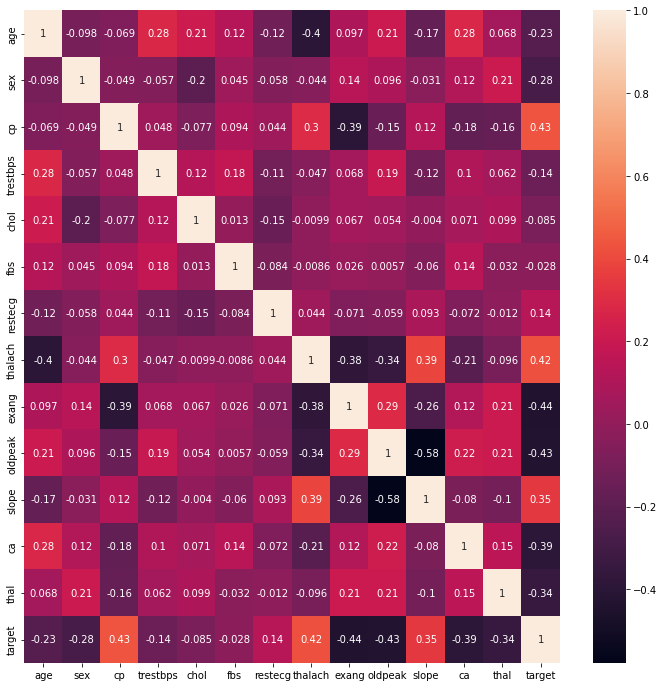

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)
sns.heatmap(df.corr(),annot = True)
plt.show()

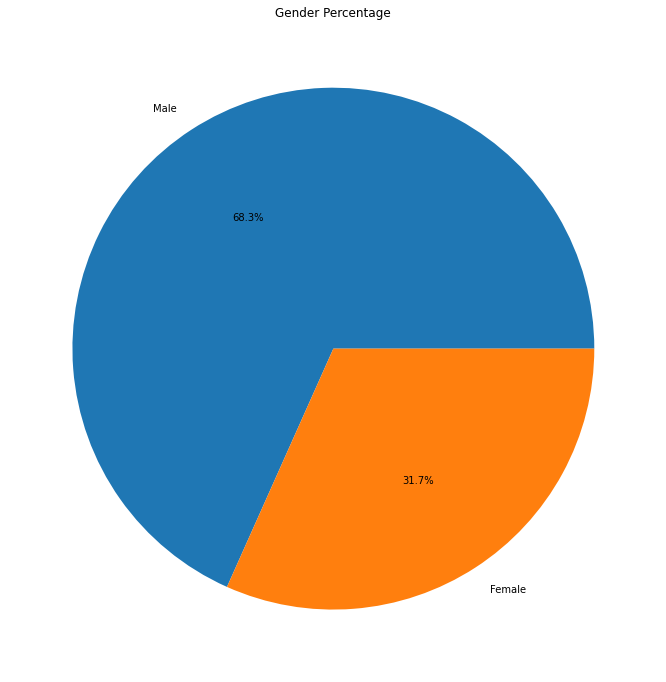

In [ ]:
Gender = (df["sex"]).value_counts()
percent_male = Gender[1]*100/len(df)
percent_female = Gender[0]*100/len(df)

values = [percent_male, percent_female]
labels = ["Male", "Female"]
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title("Gender Percentage")    
plt.show()

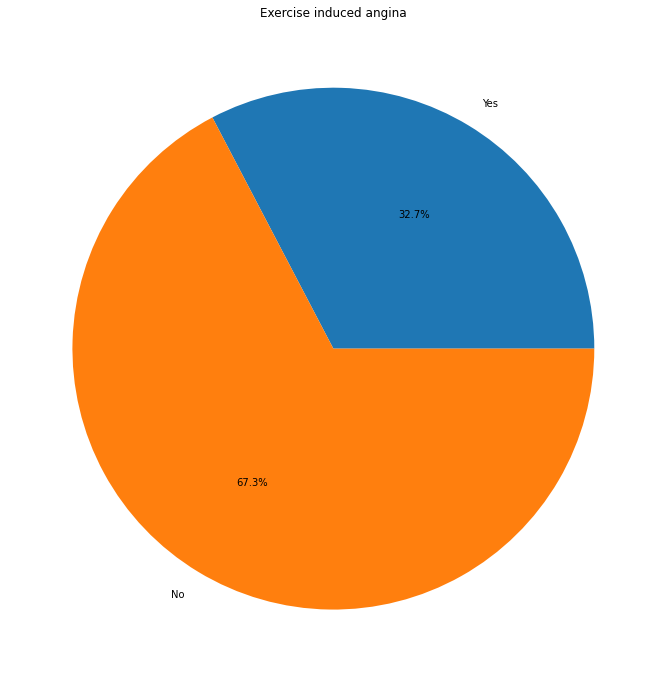

In [ ]:
Exercise = (df["exang"]).value_counts()
percent_yes = Exercise[1]*100/len(df)
percent_no = Exercise[0]*100/len(df)

values = [percent_yes, percent_no]
labels = ["Yes", "No"]
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.title("Exercise induced angina")    
plt.show()

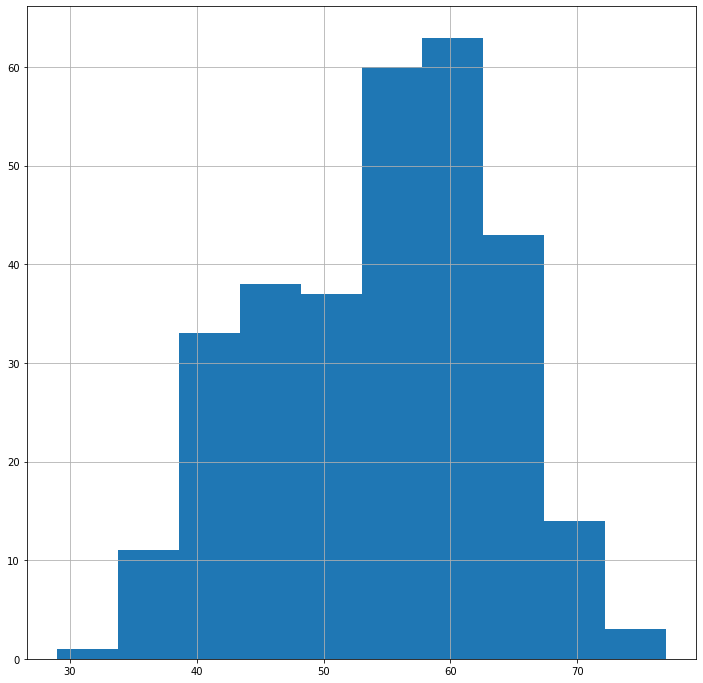

In [ ]:
df['age'].hist(grid=True)

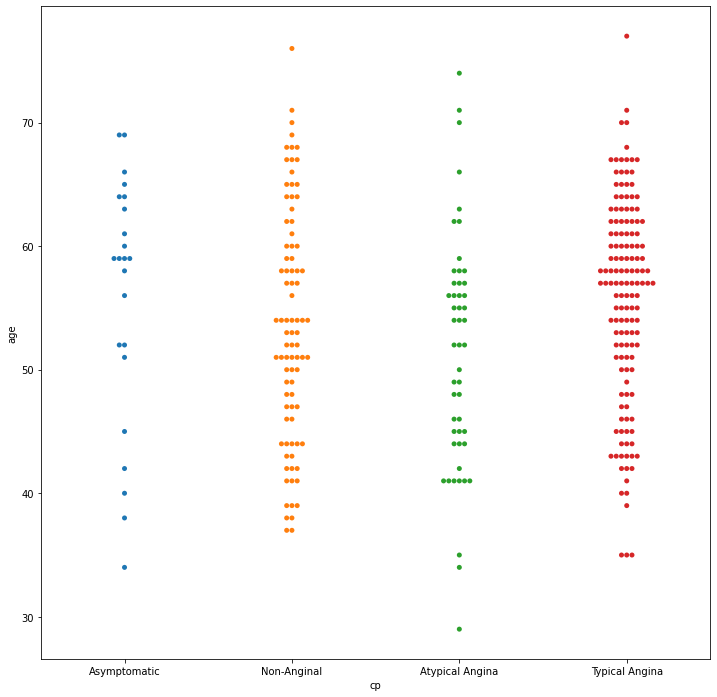

In [ ]:
result=[]
for i in df['cp']:
    if i == 0:
        result.append('Typical Angina')
    if i ==1:
        result.append('Atypical Angina')
    if i ==2:
        result.append('Non-Anginal') # 非心絞痛'
    if i==3:
        result.append('Asymptomatic') #無症狀
        
df['cp']=pd.Series(result)

sns.swarmplot(x='cp', y='age', data=df)

[<matplotlib.patches.Rectangle object at 0x7f852b448690>, <matplotlib.patches.Rectangle object at 0x7f852b495650>, <matplotlib.patches.Rectangle object at 0x7f852b448dd0>, <matplotlib.patches.Rectangle object at 0x7f852b448590>, <matplotlib.patches.Rectangle object at 0x7f852b453590>, <matplotlib.patches.Rectangle object at 0x7f852b4483d0>, <matplotlib.patches.Rectangle object at 0x7f852b4536d0>, <matplotlib.patches.Rectangle object at 0x7f852b448450>]


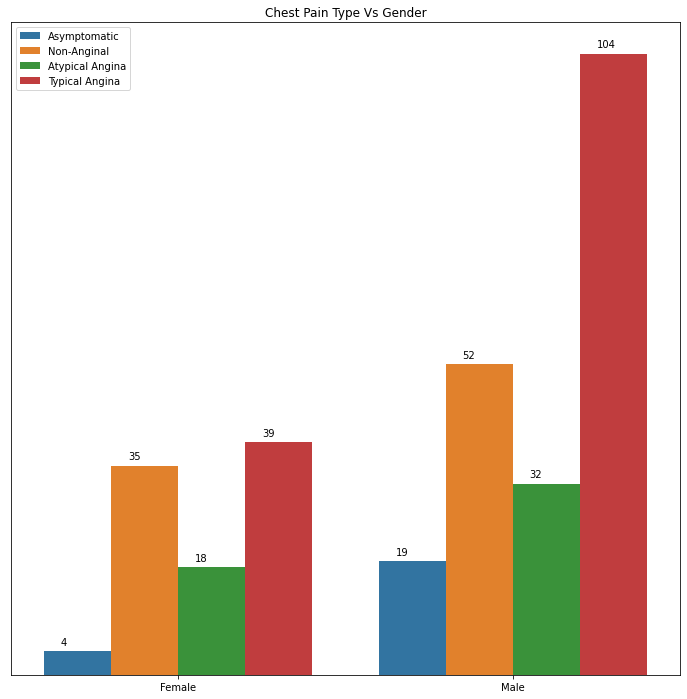

In [ ]:
ax = sns.countplot(hue=result,x='sex',data=df)

plt.title("Chest Pain Type Vs Gender")    
plt.ylabel("")
plt.yticks([])
plt.xlabel("")
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.05, p.get_height()+1))
ax.set_xticklabels(['Female','Male'])
print(ax.patches)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



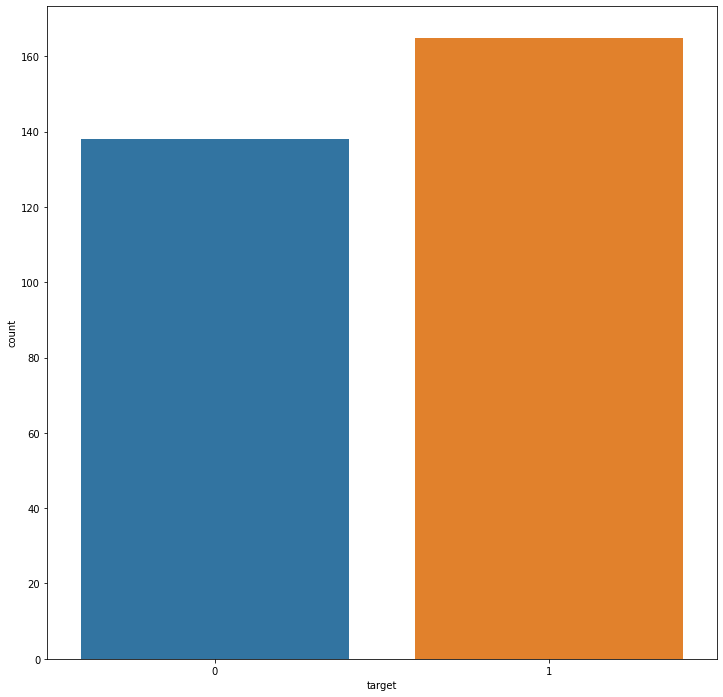

In [ ]:
sns.countplot(df['target'])

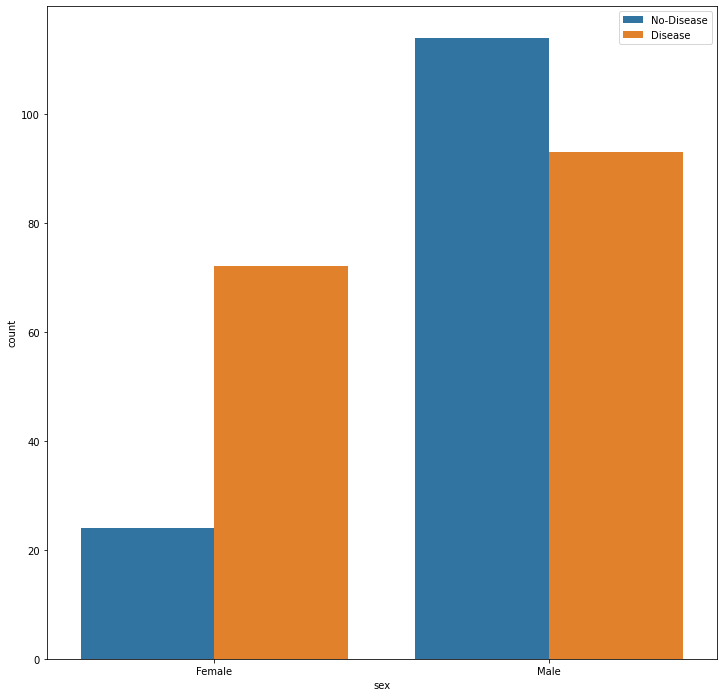

In [ ]:
sns.countplot(x='sex',hue="target",data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

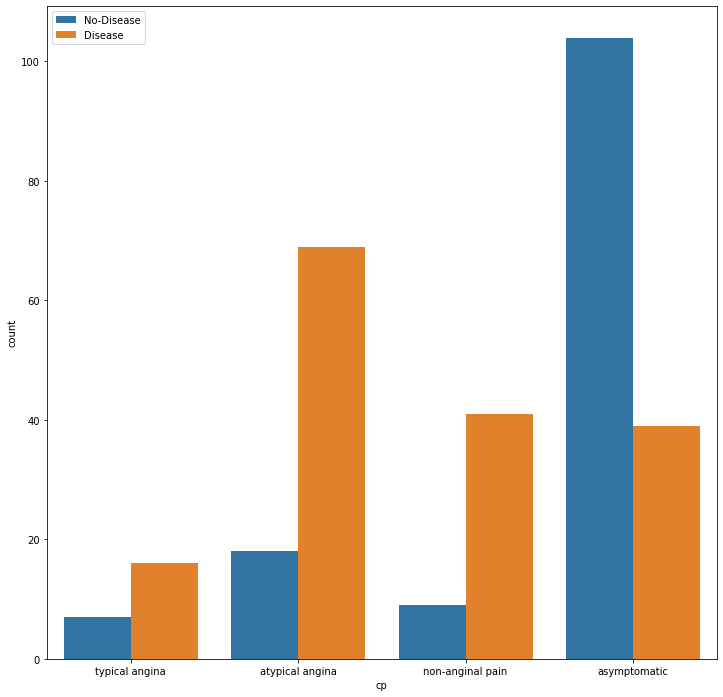

In [ ]:
sns.countplot(x="cp", hue="target", data=df)
plt.legend(labels = ['No-Disease','Disease'])
plt.xticks([0,1,2,3],["typical angina", "atypical angina", "non-anginal pain","asymptomatic"])
plt.xticks()
plt.show()

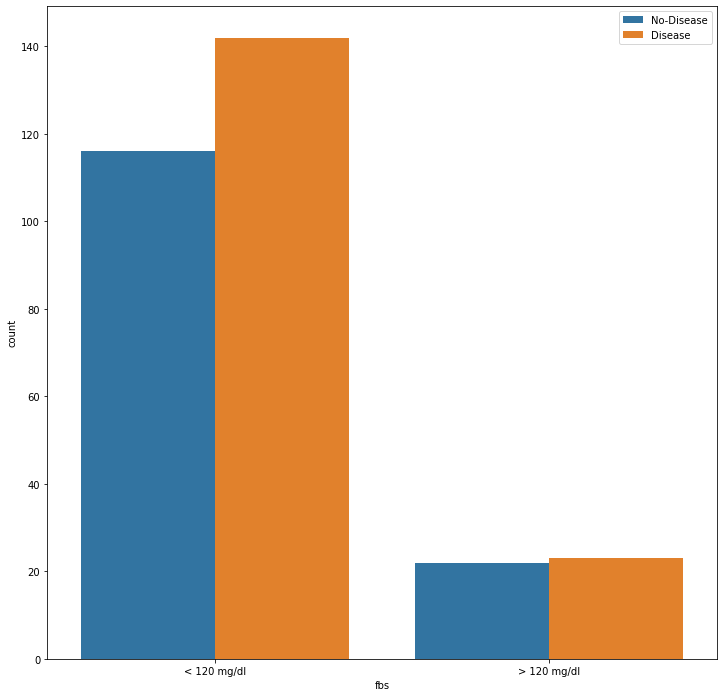

In [ ]:
sns.countplot(x="fbs", hue="target", data=df) #空腹血糖
plt.legend(labels = ['No-Disease','Disease'])
plt.xticks([0,1],["< 120 mg/dl", "> 120 mg/dl"])
plt.show()

In [ ]:
fig = px.scatter(df, x = 'chol', y = 'trestbps', color = "target") #血清膽固醇 vs 高血壓
fig.show()


In [ ]:
fig = px.scatter(df, x = 'chol', y = 'thalach', color = "target") #血清膽固醇 vs 達到的最大心率
fig.show()

In [ ]:
fig = px.scatter(df, x = 'trestbps', y = 'thalach', color = "target") #高血壓 vs 達到的最大心率
fig.show()

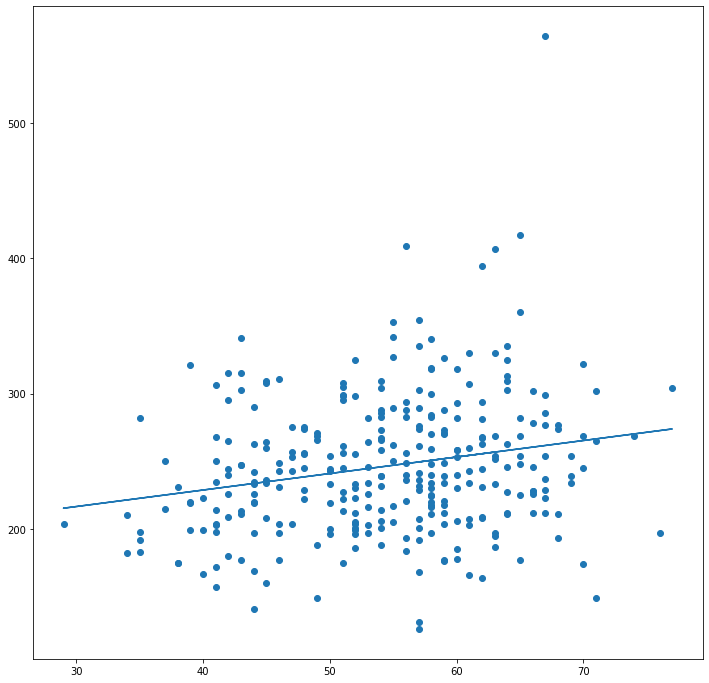

0.21367795655956176


In [ ]:
x = df["age"]
y = df["chol"]
slope, intercept, r, p , std_err = stats.linregress(x, y)

def bestfix(x):
  return slope * x + intercept

myModel = list(map(bestfix, x))

plt.scatter(x, y)
plt.plot(x, myModel)
plt.show()

print(r)

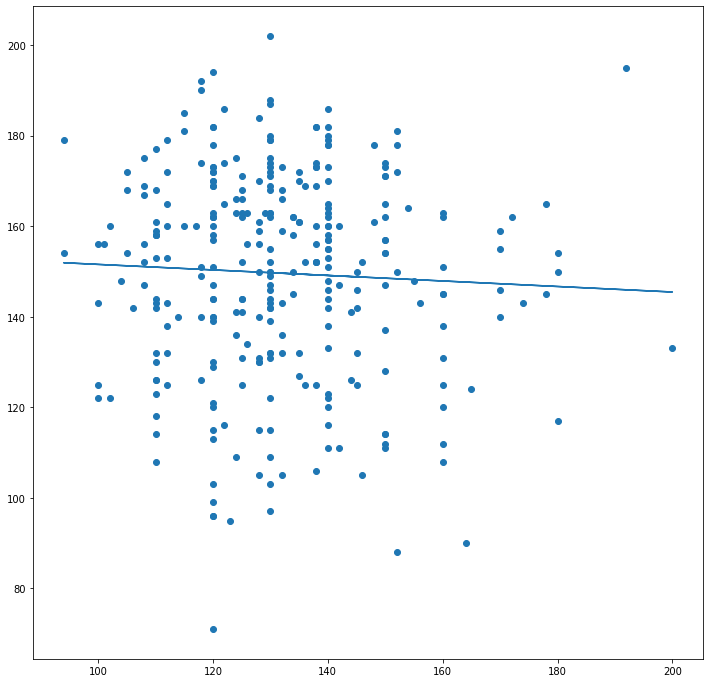

-0.046697728147954316


In [ ]:
x = df["trestbps"]
y = df["thalach"]
slope, intercept, r, p , std_err = stats.linregress(x, y)

def bestfix(x):
  return slope * x + intercept

myModel = list(map(bestfix, x))

plt.scatter(x, y)
plt.plot(x, myModel)
plt.show()

print(r)

In [ ]:
fig = px.scatter_3d(df, x = "trestbps", y = "chol", z = "thalach", color = "target") # 血壓 vs 膽固醇 vs 達到的最大心率
fig.show()

In [ ]:
x = df[["trestbps", "chol"]]
y = df["thalach"]

regr = linear_model.LinearRegression()
regr.fit(x, y)

predictVolumn = regr.predict([[120, 220]])
print(predictVolumn)
print(regr.coef_)

[150.39718114]
[-0.06030408 -0.00187923]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
x_data = df2.drop(['target'], axis = 1)
y = df2.target.values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.2)
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
292   58    0   0       170   225    1        0      146      1      2.8   
210   57    1   2       128   229    0        0      150      0      0.4   
296   63    0   0       124   197    0        1      136      1      0.0   
39    65    0   2       160   360    0        0      151      0      0.8   
73    51    1   0       140   261    0        0      186      1      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
276   58    1   0       146   218    0        1      105      0      2.0   
34    51    1   3       125   213    0        0      125      1      1.4   
221   55    1   0       140   217    0        1      111      1      5.6   
189   41    1   0       110   172    0        0      158      0      0.0   
30    41    0   1       105   198    0        1      168      0      0.0   

     slope  ca  thal  
292      1   2     1  
210      1   1     3  
296      1   0    

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)

[[ 0.38372551 -1.49220195 -0.936794   ... -0.6387615   1.26313001
  -2.11203869]
 [ 0.27238069  0.67015058  0.96031184 ... -0.6387615   0.27707368
   1.08241983]
 [ 0.94044956 -1.49220195 -0.936794   ... -0.6387615  -0.70898265
  -0.51480943]
 ...
 [ 0.04969107  0.67015058 -0.936794   ... -2.2832326  -0.70898265
   1.08241983]
 [-1.50913628  0.67015058 -0.936794   ...  1.0057096  -0.70898265
   1.08241983]
 [-1.50913628 -1.49220195  0.01175892 ...  1.0057096   0.27707368
  -0.51480943]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)
print("KNN accuracy: {:.2f}%".format(classifier.score(x_test, y_test)*100))

KNN accuracy: 86.89%


In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)
print(y_test)


[1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1]
[1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[21  4]
 [ 4 32]]


0.8688524590163934

In [ ]:
import numpy as np
error = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

print(error)


[0.19672131147540983, 0.18032786885245902, 0.14754098360655737, 0.14754098360655737, 0.14754098360655737, 0.13114754098360656, 0.13114754098360656, 0.13114754098360656, 0.11475409836065574, 0.13114754098360656, 0.11475409836065574, 0.13114754098360656, 0.09836065573770492, 0.11475409836065574, 0.13114754098360656, 0.13114754098360656, 0.14754098360655737, 0.11475409836065574, 0.11475409836065574, 0.08196721311475409, 0.09836065573770492, 0.06557377049180328, 0.09836065573770492, 0.08196721311475409, 0.09836065573770492, 0.06557377049180328, 0.06557377049180328, 0.06557377049180328, 0.09836065573770492, 0.09836065573770492, 0.11475409836065574, 0.11475409836065574, 0.13114754098360656, 0.11475409836065574, 0.11475409836065574, 0.11475409836065574, 0.11475409836065574, 0.11475409836065574, 0.11475409836065574]


Text(0, 0.5, 'Mean Error')

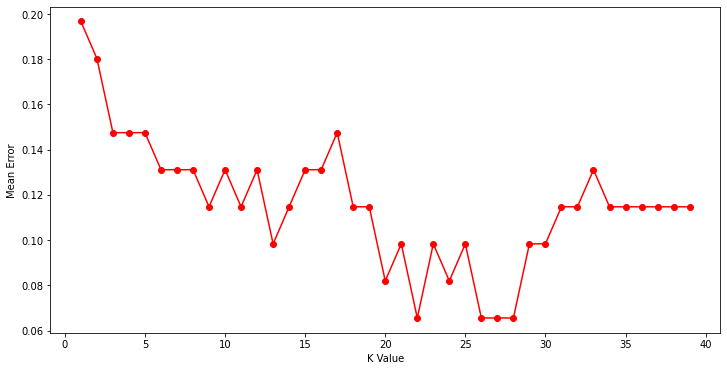

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error, color = "red", marker = "o")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

In [ ]:
k = 21
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)


0.9016393442622951